# Import libraries, set config

In [1]:
import sys
sys.path.append('..')

import json
import joblib
import warnings
from collections import defaultdict
import numpy as np
import pandas as pd
from glob import glob
from optimizer.optimizer import Optimizer
from os import environ
from datetime import timedelta
from tqdm.auto import tqdm
from datetime import datetime

import lightgbm as lgb
import optuna

from eli5.sklearn import PermutationImportance
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import log_loss, precision_score

from colorama import Style, Fore
from time import sleep

# Set environment variable
environ["ENV"] = "optimize"

from config.config import ConfigFactory
from indicators import indicators


class CFG:
    load = False
    historical = False
    create_dataset = False
    cls_target_ratio_tp = 1.03
    cls_target_ratio_sl = 1.03
    ttype = 'both'
    patterns_to_filter = ['STOCH_RSI_Volume24', 'Pattern_Trend_Volume24']
    select_features = False
    n_repeats = 1
    n_folds = 5
    agg_periods = [24, 168, 720]
    agg_funcs = [np.min, np.max, np.mean, np.median, np.std]

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

tqdm.pandas()

warnings.simplefilter(action='ignore', category=(FutureWarning, pd.errors.PerformanceWarning))

# Load STOCH_RSI buy data

In [2]:
work_timeframe = '1h'
higher_timeframe = '4h'
opt_limit = 100000
load = False 

ttype = 'buy'
pattern = ['STOCH', 'RSI', 'Volume24']
indicator_list = pattern
indicator_list_higher = ['Trend', 'MACD']

# Get configs
configs = ConfigFactory.factory(environ).configs
configs['Indicator_list'] = indicator_list
configs['Higher_TF_indicator_list'] = indicator_list_higher
configs['Timeframes']['work_timeframe'] = work_timeframe
configs['Timeframes']['higher_timeframe'] = higher_timeframe

optim_dict = {
                'RSI': {
                        'timeperiod': [14], 
                        'low_bound': [35]
                       },
                'STOCH': {
                          'fastk_period': [9],
                          'slowk_period': [7],
                          'slowd_period': [3], 
                          'low_bound': [25]
                        }
             }

if CFG.load:
  print(f'Timeframe is {work_timeframe}/{higher_timeframe}, trade type is {ttype}')
  opt = Optimizer(pattern, optim_dict, clean=True, **configs)
  min_time = datetime.now().replace(microsecond=0, second=0, minute=0) - pd.to_timedelta(365 * 5, unit='D')
  stat = opt.optimize(pattern, ttype, opt_limit, load=True, op_type='ml', historical=CFG.historical, min_time=min_time)
  display(stat)

# Load STOCH_RSI sell data

In [3]:
work_timeframe = '1h'
higher_timeframe = '4h'
opt_limit = 100000
load = False 

ttype = 'sell'
pattern = ['STOCH', 'RSI', 'Volume24']
indicator_list = pattern
indicator_list_higher = ['Trend', 'MACD']

# Get configs
configs = ConfigFactory.factory(environ).configs
configs['Indicator_list'] = indicator_list
configs['Higher_TF_indicator_list'] = indicator_list_higher
configs['Timeframes']['work_timeframe'] = work_timeframe
configs['Timeframes']['higher_timeframe'] = higher_timeframe

optim_dict = {
                'RSI': {
                        'timeperiod': [14], 
                        'low_bound': [35]
                       },
                'STOCH': {
                          'fastk_period': [9],
                          'slowk_period': [7],
                          'slowd_period': [3], 
                          'low_bound': [25]
                        }
             }

if CFG.load:
  print(f'Timeframe is {work_timeframe}/{higher_timeframe}, trade type is {ttype}')
  opt = Optimizer(pattern, optim_dict, clean=False, **configs)
  min_time = datetime.now().replace(microsecond=0, second=0, minute=0) - pd.to_timedelta(365 * 5, unit='D')
  stat = opt.optimize(pattern, ttype, opt_limit, load=False, op_type='ml', historical=CFG.historical, min_time=min_time)
  display(stat)

# Load Pattern buy data

In [4]:
work_timeframe = '1h'
higher_timeframe = '4h'
opt_limit = 100000
load = False 

ttype = 'buy'
pattern = ['Pattern', 'Trend', 'Volume24']
indicator_list = pattern
indicator_list_higher = ['Trend', 'MACD']

# Get configs
configs = ConfigFactory.factory(environ).configs
configs['Indicator_list'] = indicator_list
configs['Higher_TF_indicator_list'] = indicator_list_higher
configs['Timeframes']['work_timeframe'] = work_timeframe
configs['Timeframes']['higher_timeframe'] = higher_timeframe

optim_dict = {
                'Pattern': {
                            'vol_window': [96],
                            'vol_q_high': [0.75],
                            'vol_q_low': [0.1],
                            'window_low_bound': [1], 
                            'window_high_bound': [5],
                            'first_candle': [0.5],
                            'second_candle': [0.5],
                            },
                'Trend': {
                            'timeperiod': [30],
                            'low_bound': [0]
                            }
             }

if CFG.load:
  print(f'Timeframe is {work_timeframe}/{higher_timeframe}, trade type is {ttype}')
  opt = Optimizer(pattern, optim_dict, clean=False  , **configs)
  min_time = datetime.now().replace(microsecond=0, second=0, minute=0) - pd.to_timedelta(365 * 5, unit='D')
  stat = opt.optimize(pattern, ttype, opt_limit, load=False, op_type='ml', historical=CFG.historical, min_time=min_time)
  display(stat)

# Load Pattern sell data

In [5]:
work_timeframe = '1h'
higher_timeframe = '4h'
opt_limit = 100000
load = False 

ttype = 'sell'
pattern = ['Pattern', 'Trend', 'Volume24']
indicator_list = pattern
indicator_list_higher = ['Trend', 'MACD']

# Get configs
configs = ConfigFactory.factory(environ).configs
configs['Indicator_list'] = indicator_list
configs['Higher_TF_indicator_list'] = indicator_list_higher
configs['Timeframes']['work_timeframe'] = work_timeframe
configs['Timeframes']['higher_timeframe'] = higher_timeframe

optim_dict = {
                'Pattern': {
                            'vol_window': [96],
                            'vol_q_high': [0.75],
                            'vol_q_low': [0.1],
                            'window_low_bound': [1], 
                            'window_high_bound': [5],
                            'first_candle': [0.5],
                            'second_candle': [0.5],
                            },
                'Trend': {
                            'timeperiod': [30],
                            'low_bound': [0]
                            }
             }

if CFG.load:
  print(f'Timeframe is {work_timeframe}/{higher_timeframe}, trade type is {ttype}')
  opt = Optimizer(pattern, optim_dict, clean=False, **configs)
  min_time = datetime.now().replace(microsecond=0, second=0, minute=0) - pd.to_timedelta(365 * 5, unit='D')
  stat = opt.optimize(pattern, ttype, opt_limit, load=False, op_type='ml', historical=CFG.historical, min_time=min_time)
  display(stat)

# Check if all dataframes has data for both timeframes 1h and 4h

In [6]:
import glob

x = glob.glob('../optimizer/ticker_dataframes/*.pkl')
y = [i[31:].split('_')[0] for i in x]
z = ('').join(x)

for i in y:
    if f'{i}_1h' not in z:
        print(i, '1h')
    if f'{i}_4h' not in z:
        print(i, '4h')

# Prepare data

In [7]:
# Get configs
configs = ConfigFactory.factory(environ).configs

def get_file(ticker):
    ''' Find files buy ticker names '''
    try:
        tmp_df_1h = pd.read_pickle(f'../optimizer/ticker_dataframes/{ticker}_1h.pkl')
        tmp_df_4h = pd.read_pickle(f'../optimizer/ticker_dataframes/{ticker}_4h.pkl')
    except FileNotFoundError:
        return None, None
    else:
        return tmp_df_1h, tmp_df_4h

def add_indicators(df, df_higher, ttype, configs):
    # add RSI
    rsi = indicators.RSI(ttype, configs)
    df = rsi.get_indicator(df, '', '', 0)
    # add RSI
    stoch = indicators.STOCH(ttype, configs)
    df = stoch.get_indicator(df, '', '', 0)
    # add ATR
    atr = indicators.ATR(ttype, configs)
    df = atr.get_indicator(df, '', '', 0)
    # add Volume24
    vol24 = indicators.Volume24(ttype, configs)
    df = vol24.get_indicator(df, '', '1h', 0)
    # add MACD
    macd = indicators.MACD(ttype, configs)
    # df = macd.get_indicator(df, '', '', 0)
    df_higher = macd.get_indicator(df_higher, '', '', 0)
    # add Trend
    trend = indicators.Trend(ttype, configs)
    # df = trend.get_indicator(df, '', '', 0)
    df_higher = trend.get_indicator(df_higher, '', '', 0)
    higher_features = ['time', 'linear_reg', 'linear_reg_angle', 'macd', 'macdhist', 
                        'macd_dir', 'macdsignal', 'macdsignal_dir']
    # merge higher timeframe indicators with working timeframe
    df = pd.merge(df, df_higher[higher_features], how='left', on='time')
    df.ffill(inplace=True)
    df = df.dropna()
    return df.reset_index(drop=True)

def create_train_df(df, ttype, configs, target_offset, first, last, step):
    ''' Create train dataset from signal statistics and ticker candle data'''
    train_df = pd.DataFrame()
    tickers = df['ticker'].unique()
    
    for ticker in tqdm(tickers):
        # get signals with current ticker
        signal_df = df[df['ticker'] == ticker]
        times = signal_df['time']
        
        # load candle history of this ticker
        tmp_df_1h, tmp_df_4h = get_file(ticker)

        # add indicators 
        try:
            tmp_df_1h = add_indicators(tmp_df_1h, tmp_df_4h, ttype, configs)
        except TypeError:
            continue

        # add historical data for current ticker
        for i, t in enumerate(times.to_list()):
            pass_cycle, sl = False, False
            pattern = signal_df.iloc[i, signal_df.columns.get_loc('pattern')]
            if pattern.startswith('MACD'):
                row = tmp_df_1h.loc[tmp_df_1h['time'] == t + timedelta(hours=3), :].reset_index(drop=True)
            else:
                row = tmp_df_1h.loc[tmp_df_1h['time'] == t, :].reset_index(drop=True)
            
            for i in range(first, last + 1):
                # collect features every hour for the first 24 hours, than collect features every 4 hours
                if i > 24 and i % step != 0:
                    continue
                time_prev = t + timedelta(hours= -i)
                try:
                    row_tmp = tmp_df_1h.loc[tmp_df_1h['time'] == time_prev, :].reset_index(drop=True)
                    row_tmp.columns = [c + f'_prev_{i}' for c in row_tmp.columns]
                except IndexError:
                    pass_cycle = True
                    break
                row = pd.concat([row, row_tmp.iloc[:,1:]], axis=1)
                row['ticker'] = ticker
                row['pattern'] = pattern
                
            if pass_cycle:
                continue

            row['target'] = 0
            row['ttype'] = ttype
            
            # If ttype = buy and during the selected period high price was higher than close_price * target_ratio
            # and earlier low price wasn't lower than close_price / target_ratio, than target is True, else target is False.
            # Similarly for ttype = sell 
            if pattern.startswith('MACD'):
                close_price = tmp_df_1h.loc[tmp_df_1h['time'] == t + timedelta(hours=3), 'close']
            else:
                close_price = tmp_df_1h.loc[tmp_df_1h['time'] == t, 'close']

            if close_price.shape[0] == 0:
                break
            
            close_price = close_price.values[0]
            
            for i in range(1, target_offset + 1):
                if pattern.startswith('MACD'):
                    time_next = t + timedelta(hours=3+i)
                else:
                    time_next = t + timedelta(hours=i)
                target_buy = tmp_df_1h.loc[tmp_df_1h['time'] == time_next, 'high']
                target_sell = tmp_df_1h.loc[tmp_df_1h['time'] == time_next, 'low']
                
                if target_buy.shape[0] == 0 or target_sell.shape[0] == 0:
                    pass_cycle = True
                    break
                
                target_buy = target_buy.values[0]
                target_sell = target_sell.values[0]

                target_buy_tp = 1 if target_buy > close_price * CFG.cls_target_ratio_tp else 0
                target_buy_sl = 1 if target_buy > close_price * CFG.cls_target_ratio_sl else 0
                target_sell_tp = 1 if target_sell < close_price * (2 - CFG.cls_target_ratio_tp) else 0
                target_sell_sl = 1 if target_sell < close_price * (2 - CFG.cls_target_ratio_sl) else 0

                pattern = row['pattern'].values[0]
                ttype = row['ttype'].values[0]
                
                # set sl flag and exit cycle if price crosses stop-loss threshold before it crosses take-profit threshold
                # (SL depends on ttype and pattern)
                sl1 = pattern.startswith('STOCH') and ttype == 'buy' and target_buy_sl == 1
                sl2 = pattern.startswith('STOCH') and ttype == 'sell' and target_sell_sl == 1
                sl3 = pattern.startswith('Pattern') and ttype == 'buy' and target_sell_sl == 1
                sl4 = pattern.startswith('Pattern') and ttype == 'sell' and target_buy_sl == 1
                
                if sl1 or sl2 or sl3 or sl4:
                    break

                # set tp flag and exit cycle if price cross take-profit threshold and doesn't cross stop-loss threshold before
                # (TP depends on ttype and pattern)
                tp1 = pattern.startswith('STOCH') and ttype == 'buy' and target_sell_tp == 1
                tp2 = pattern.startswith('STOCH') and ttype == 'sell' and target_buy_tp == 1
                tp3 = pattern.startswith('Pattern') and ttype == 'buy' and target_buy_tp == 1
                tp4 = pattern.startswith('Pattern') and ttype == 'sell' and target_sell_tp == 1
                    
                if tp1 or tp2 or tp3 or tp4:
                    row['target'] = 1
                    break
                
                # if price doesn't cross both tp and sl threshold but price above / below enter price for buy / sell trade - set tp flag
                # (depends on ttype and pattern)
                if i == target_offset: 
                    last_price = tmp_df_1h.loc[tmp_df_1h['time'] == time_next, 'close'].values[0]
                    l1 = pattern.startswith('STOCH') and ttype == 'buy' and last_price < close_price
                    l2 = pattern.startswith('STOCH') and ttype == 'sell' and last_price > close_price
                    l3 = pattern.startswith('Pattern') and ttype == 'buy' and last_price > close_price
                    l4 = pattern.startswith('Pattern') and ttype == 'sell' and last_price < close_price

                    if l1 or l2 or l3 or l4:
                        row['target'] = 1
            
            if pass_cycle:
                continue

            # add aggregates
            # for col in ['open', 'close', 'low', 'high', 'volume']:
            #     for period in CFG.agg_periods:
            #         for agg_func in CFG.agg_funcs:
            #             tmp_len = min(len(tmp_df_1h), period)
            #             stat_val = tmp_df_1h.iloc[-tmp_len:, tmp_df_1h.columns.get_loc(col)].rolling(period, min_periods=1).agg({'func': agg_func}).values[-1, 0]
            #             row[f'{col}_{agg_func.__name__}_{period}'] = stat_val
            
            # add data to the dataset
            if train_df.shape[0] == 0:
                train_df = row
            else:
                train_df = pd.concat([train_df, row])
    
    return train_df

if CFG.create_dataset:
    # for how long time (in hours) we want to predict
    target_offset = 96
    # first previous data point to collect for model training (value represents number of hours before signal point)
    first = 1
    # last previous data point to collect for model training (value represents number of hours before signal point)
    last = 192
    # step of previous data points collecting (total number of points to collect is (last - first + step) / step)
    step = 4

    # Buy
    # dataset with the signal statistics
    df = pd.read_pickle('signal_stat/buy_stat_1h.pkl')
    df = df[df['time'].dt.year > 1970]
    df = df[df['pattern'].isin(CFG.patterns_to_filter)]
    df = df[df['time'].dt.hour.isin([3, 7, 11, 15, 19, 23])]

    # dataset for model train
    train_buy = create_train_df(df, 'buy', configs, target_offset, first, last, step)
    train_buy = train_buy.dropna()

    # Sell
    # dataset with the signal statistics
    df = pd.read_pickle('signal_stat/sell_stat_1h.pkl')
    df = df[df['time'].dt.year > 1970]
    df = df[df['pattern'].isin(CFG.patterns_to_filter)]
    df = df[df['time'].dt.hour.isin([3, 7, 11, 15, 19, 23])]
    # dataset for model train
    train_sell = create_train_df(df, 'sell', configs, target_offset, first, last, step)
    train_sell = train_sell.dropna()

    train_buy = pd.concat([train_buy, train_sell[train_sell['ttype'] == 'buy']]).sort_values('time').reset_index(drop=True)
    train_sell = pd.concat([train_sell, train_buy[train_buy['ttype'] == 'sell']]).sort_values('time').reset_index(drop=True)

    train_buy = train_buy[train_buy['ttype'] == 'buy']
    train_sell = train_sell[train_sell['ttype'] == 'sell']

    train_buy.to_pickle(f'signal_stat/train_buy_{last}.pkl')
    train_sell.to_pickle(f'signal_stat/train_sell_{last}.pkl')

    # display(df.head())
    # display(df.shape)


# Check pattern / target distribution

In [8]:
if CFG.create_dataset:
    display(train_buy['ttype'].value_counts())
    display(train_sell['ttype'].value_counts())

    display(train_buy[['target', 'pattern']].value_counts())
    display(train_sell[['target', 'pattern']].value_counts())

In [9]:
# buy    10347
# Name: ttype, dtype: int64sell    8168
# Name: ttype, dtype: int64target  pattern               
# 1       STOCH_RSI_Volume24        3472
# 0       STOCH_RSI_Volume24        3281
# 1       Pattern_Trend_Volume24    1893
# 0       Pattern_Trend_Volume24    1701
# dtype: int64target  pattern               
# 0       STOCH_RSI_Volume24        2755
# 1       STOCH_RSI_Volume24        2677
# 1       Pattern_Trend_Volume24    1403
# 0       Pattern_Trend_Volume24    1333
# dtype: int64

# Check target corectness

In [10]:
# i = 557

# x = train_sell[['ticker', 'ttype', 'pattern', 'time', 'close', 'target']]
# y = x.iloc[i]
# low_price, high_price = y['close'] / CFG.cls_target_ratio_tp, y['close'] * CFG.cls_target_ratio_tp,
# print(y['ticker'], y['time'], y['ttype'], y['target'])

# tmp_df_1h = pd.read_pickle(f'../optimizer/ticker_dataframes/{y["ticker"]}_1h.pkl')
# # tmp_df_1h = pd.read_pickle(f'../optimizer/ticker_dataframes/{y["ticker"][:-4]}-{y["ticker"][-4:]}_1h.pkl')
# # tmp_df_1h = pd.read_pickle(f'../optimizer/ticker_dataframes/{y["ticker"][:-4]}-{y["ticker"][-4:]}-SWAP_4h.pkl')

# tmp_df_1h['low_price'] = low_price
# tmp_df_1h['high_price'] = high_price
# idx = tmp_df_1h[tmp_df_1h['time'] == y['time']].index[0]

# tmp_df_1h = tmp_df_1h.iloc[idx:idx+target_offset+1][['time', 'close', 'high', 'high_price', 'low', 'low_price']]

# if y['ttype'] == 'buy':
#     tmp_df_1h['signal'] = tmp_df_1h['high'] > tmp_df_1h['high_price']
#     tmp_df_1h['anti_signal'] = tmp_df_1h['low'] < tmp_df_1h['low_price']
# else:
#     tmp_df_1h['signal'] = tmp_df_1h['low'] < tmp_df_1h['low_price']
#     tmp_df_1h['anti_signal'] = tmp_df_1h['high'] > tmp_df_1h['high_price']

# tmp_df_1h

# Compare indicator values for bot and optimizer

In [11]:
# import pandas as pd

# ttype = 'buy'
# timeframe = '4h'
# ticker = '1INCHUSDT'
# configs = ConfigFactory.factory(environ).configs

# # x = pd.read_csv(f'../bot/ticker_dataframes/{ticker}_{timeframe}_{ttype}_12_28_0.csv').drop(columns=['Unnamed: 0']).reset_index(drop=True)
# x = pd.read_pickle(f'../optimizer/ticker_dataframes/{ticker}_1h.pkl')
# y = pd.read_pickle(f'../optimizer/ticker_dataframes/{ticker}_4h.pkl')

# # add RSI
# rsi = indicators.RSI(ttype, configs)
# x = rsi.get_indicator(x, '', '', 0)
# # add STOCH
# stoch = indicators.STOCH(ttype, configs)
# x = stoch.get_indicator(x, '', '', 0)
# # add ATR
# atr = indicators.ATR(ttype, configs)
# x = atr.get_indicator(x, '', '', 0)
# # add Volume24
# vol24 = indicators.Volume24(ttype, configs)
# x = vol24.get_indicator(x, '', '1h', 0)
# # add trend
# trend = indicators.Trend(ttype, configs)
# y = trend.get_indicator(y, '', '', 0)
# # add MACD
# macd = indicators.MACD(ttype, configs)
# y = macd.get_indicator(y, '', '', 0)

# cols = ['time', 'open', 'high', 'low', 'close', 'volume', 'rsi', 'stoch_slowk', 'stoch_slowd', 'linear_reg', 'linear_reg_angle', 'macd', 'macdsignal', 'macdhist']

# higher_features = ['time', 'linear_reg', 'linear_reg_angle', 'macd', 'macdhist',  'macd_dir',
#                            'macdsignal', 'macdsignal_dir']
# x[higher_features] = pd.merge(x[['time']], y[higher_features], how='left', on='time')
# x.ffill(inplace=True)
# x.dropna(inplace=True)
# x.reset_index(drop=True, inplace=True)

# x[cols].tail(10)

# Check buy trades correctness

In [12]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf

if CFG.create_dataset:
    plt_num = 3
    j = 1
    fig = plt.figure(figsize=(30, 6 * plt_num))

    buy_idxs = train_buy.index
    test_buy = train_buy.sample(plt_num, axis=0)

    for i, row in test_buy.iterrows():
        ticker = row['ticker']
        time = row['time']
        target = row['target']
        ttype = row['ttype']
        pattern = row['ttype']

        df_1h, _ = get_file(ticker)
        df_1h = df_1h[(df_1h['time'] >= time) & (df_1h['time'] <= time + timedelta(hours=target_offset))]

        ohlc = df_1h[['time', 'open', 'high', 'low', 'close', 'volume']].set_index('time')
        
        price = df_1h.iloc[0]['close']
        high_price = price * CFG.cls_target_ratio_tp
        low_price = price * (2 - CFG.cls_target_ratio_tp)

        ax = fig.add_subplot(plt_num, 1, j)
        mpf.plot(ohlc, type='candle', warn_too_much_data=1001, style='yahoo', ylabel='', tz_localize=True, ax=ax)
        
        if ttype == 'buy':
            ax.axhline(high_price, color='g')
            ax.axhline(low_price, color='r')
        else:
            ax.axhline(high_price, color='r')
            ax.axhline(low_price, color='g')
        ax.set_title(f'Ticker: {ticker}, price: {price}, pattern {pattern}, target: {target}', fontsize=20)
        j += 1
        
    fig.tight_layout()

# Check sell trades correctness

In [13]:
if CFG.create_dataset:
    plt_num = 3
    j = 1
    fig = plt.figure(figsize=(30, 6 * plt_num))

    buy_idxs = train_sell.index
    test_sell = train_sell.sample(plt_num, axis=0)

    for i, row in test_sell.iterrows():
        ticker = row['ticker']
        time = row['time']
        target = row['target']
        ttype = row['ttype']
        pattern = row['pattern']

        df_1h, _ = get_file(ticker)
        df_1h = df_1h[(df_1h['time'] >= time) & (df_1h['time'] <= time + timedelta(hours=target_offset))]
        
        ohlc = df_1h[['time', 'open', 'high', 'low', 'close', 'volume']].set_index('time')
        
        price = df_1h.iloc[0]['close']
        high_price = price * CFG.cls_target_ratio_tp
        low_price = price * (2 - CFG.cls_target_ratio_tp)

        ax = fig.add_subplot(plt_num, 1, j)
        mpf.plot(ohlc, type='candle', warn_too_much_data=1001, style='yahoo', ylabel='', tz_localize=True, ax=ax)
        
        if ttype == 'buy':
            ax.axhline(high_price, color='g')
            ax.axhline(low_price, color='r')
        else:
            ax.axhline(high_price, color='r')
            ax.axhline(low_price, color='g')
        ax.set_title(f'Ticker: {ticker}, price: {price}, pattern {pattern}, target: {target}', fontsize=20)
        j += 1
        
    fig.tight_layout()

# Concat buy and sell datasets

,time,open,high,low,close,volume,rsi,stoch_slowk,stoch_slowd,stoch_slowk_dir,stoch_slowd_dir,stoch_diff,atr,close_smooth,volume_24,linear_reg,linear_reg_angle,macd,macdhist,macd_dir,macdsignal,macdsignal_dir,open_prev_1,high_prev_1,low_prev_1,close_prev_1,volume_prev_1,rsi_prev_1,stoch_slowk_prev_1,stoch_slowd_prev_1,stoch_slowk_dir_prev_1,stoch_slowd_dir_prev_1,stoch_diff_prev_1,atr_prev_1,close_smooth_prev_1,volume_24_prev_1,linear_reg_prev_1,linear_reg_angle_prev_1,macd_prev_1,macdhist_prev_1,macd_dir_prev_1,macdsignal_prev_1,macdsignal_dir_prev_1,ticker,pattern,open_prev_2,high_prev_2,low_prev_2,close_prev_2,volume_prev_2,rsi_prev_2,stoch_slowk_prev_2,stoch_slowd_prev_2,stoch_slowk_dir_prev_2,stoch_slowd_dir_prev_2,stoch_diff_prev_2,atr_prev_2,close_smooth_prev_2,volume_24_prev_2,linear_reg_prev_2,linear_reg_angle_prev_2,macd_prev_2,macdhist_prev_2,macd_dir_prev_2,macdsignal_prev_2,macdsignal_dir_prev_2,open_prev_3,high_prev_3,low_prev_3,close_prev_3,volume_prev_3,rsi_prev_3,stoch_slowk_prev_3,stoch_slowd_prev_3,stoch_slowk_dir_prev_3,stoch_slowd_dir_prev_3,stoch_diff_prev_3,atr_prev_3,close_smooth_prev_3,volume_24_prev_3,linear_reg_prev_3,linear_reg_angle_prev_3,macd_prev_3,macdhist_prev_3,macd_dir_prev_3,macdsignal_prev_3,macdsignal_dir_prev_3,open_prev_4,high_prev_4,low_prev_4,close_prev_4,volume_prev_4,rsi_prev_4,stoch_slowk_prev_4,stoch_slowd_prev_4,stoch_slowk_dir_prev_4,stoch_slowd_dir_prev_4,stoch_diff_prev_4,atr_prev_4,close_smooth_prev_4,volume_24_prev_4,linear_reg_prev_4,linear_reg_angle_prev_4,macd_prev_4,macdhist_prev_4,macd_dir_prev_4,macdsignal_prev_4,macdsignal_dir_prev_4,open_prev_5,high_prev_5,low_prev_5,close_prev_5,volume_prev_5,rsi_prev_5,stoch_slowk_prev_5,stoch_slowd_prev_5,stoch_slowk_dir_prev_5,stoch_slowd_dir_prev_5,stoch_diff_prev_5,atr_prev_5,close_smooth_prev_5,volume_24_prev_5,linear_reg_prev_5,linear_reg_angle_prev_5,macd_prev_5,macdhist_prev_5,macd_dir_prev_5,macdsignal_prev_5,macdsignal_dir_prev_5,open_prev_6,high_prev_6,low_prev_6,close_prev_6,volume_prev_6,rsi_prev_6,stoch_slowk_prev_6,stoch_slowd_prev_6,stoch_slowk_dir_prev_6,stoch_slowd_dir_prev_6,stoch_diff_prev_6,atr_prev_6,close_smooth_prev_6,volume_24_prev_6,linear_reg_prev_6,linear_reg_angle_prev_6,macd_prev_6,macdhist_prev_6,macd_dir_prev_6,macdsignal_prev_6,macdsignal_dir_prev_6,open_prev_7,high_prev_7,low_prev_7,close_prev_7,volume_prev_7,rsi_prev_7,stoch_slowk_prev_7,stoch_slowd_prev_7,stoch_slowk_dir_prev_7,stoch_slowd_dir_prev_7,stoch_diff_prev_7,atr_prev_7,close_smooth_prev_7,volume_24_prev_7,linear_reg_prev_7,linear_reg_angle_prev_7,macd_prev_7,macdhist_prev_7,macd_dir_prev_7,macdsignal_prev_7,macdsignal_dir_prev_7,open_prev_8,high_prev_8,low_prev_8,close_prev_8,volume_prev_8,rsi_prev_8,stoch_slowk_prev_8,stoch_slowd_prev_8,stoch_slowk_dir_prev_8,stoch_slowd_dir_prev_8,stoch_diff_prev_8,atr_prev_8,close_smooth_prev_8,volume_24_prev_8,linear_reg_prev_8,linear_reg_angle_prev_8,macd_prev_8,macdhist_prev_8,macd_dir_prev_8,macdsignal_prev_8,macdsignal_dir_prev_8,open_prev_9,high_prev_9,low_prev_9,close_prev_9,volume_prev_9,rsi_prev_9,stoch_slowk_prev_9,stoch_slowd_prev_9,stoch_slowk_dir_prev_9,stoch_slowd_dir_prev_9,stoch_diff_prev_9,atr_prev_9,close_smooth_prev_9,volume_24_prev_9,linear_reg_prev_9,linear_reg_angle_prev_9,macd_prev_9,macdhist_prev_9,macd_dir_prev_9,macdsignal_prev_9,macdsignal_dir_prev_9,open_prev_10,high_prev_10,low_prev_10,close_prev_10,volume_prev_10,rsi_prev_10,stoch_slowk_prev_10,stoch_slowd_prev_10,stoch_slowk_dir_prev_10,stoch_slowd_dir_prev_10,stoch_diff_prev_10,atr_prev_10,close_smooth_prev_10,volume_24_prev_10,linear_reg_prev_10,linear_reg_angle_prev_10,macd_prev_10,macdhist_prev_10,macd_dir_prev_10,macdsignal_prev_10,macdsignal_dir_prev_10,open_prev_11,high_prev_11,low_prev_11,close_prev_11,volume_prev_11,rsi_prev_11,stoch_slowk_prev_11,stoch_slowd_prev_11,stoch_slowk_dir_prev_11,stoch_slowd_dir_prev_11,stoch_diff_prev_11,atr_prev_11,close_smooth_prev_11,volume_24_prev_11,linear_reg_prev_11,linear_reg

<AxesSubplot:>

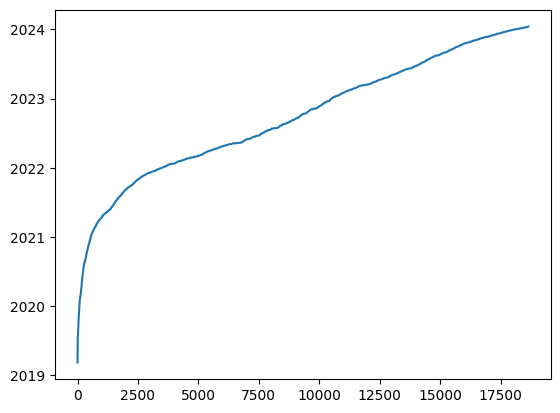

In [14]:
# last previous data point to collect for model training (value represents number of hours before signal point)
last = 192

if CFG.ttype == 'both':
    df_buy = pd.read_pickle(f'signal_stat/train_buy_{last}.pkl')
    df_sell = pd.read_pickle(f'signal_stat/train_sell_{last}.pkl')
    df = pd.concat([df_buy, df_sell])
elif CFG.ttype == 'buy':
    df = pd.read_pickle(f'signal_stat/train_buy_{last}.pkl')
else:
    df = pd.read_pickle(f'signal_stat/train_sell_{last}.pkl')

df = df.sort_values('time')
# do not consider the last signals - they may contain erroneus signals
df = df[df['time'] < df['time'].max()].reset_index(drop=True)
train_df = df

display(df)
df['time'].plot()


# Check the last signals

In [15]:
x = pd.read_pickle('signal_stat/buy_stat_1h.pkl')
x['ttype'] = 'buy'
y = pd.read_pickle('signal_stat/sell_stat_1h.pkl')
y['ttype'] = 'sell'
x = pd.concat([x, y]).sort_values('time').reset_index(drop=True)
x[['time', 'ticker', 'ttype', 'pattern']].tail(50)

,time,ticker,ttype,pattern
76589,2024-01-15 15:00:00,SELOUSDT,buy,STOCH_RSI_Volume24
76590,2024-01-15 16:00:00,BABYBONKUSDT,sell,STOCH_RSI_Volume24
76591,2024-01-15 16:00:00,NEONUSDT,sell,STOCH_RSI_Volume24
76592,2024-01-15 16:00:00,ARPAUSDT,sell,STOCH_RSI_Volume24
76593,2024-01-15 16:00:00,PRXUSDT,buy,Pattern_Trend_Volume24
76594,2024-01-15 17:00:00,ROSXUSDT,buy,STOCH_RSI_Volume24
76595,2024-01-15 17:00:00,IDUSDT,buy,Pattern_Trend_Volume24
76596,2024-01-15 17:00:00,SISUSDT,sell,STOCH_RSI_Volume24
76597,2024-01-15 17:00:00,BIGTIMEUSDT,sell,STOCH_RSI_Volume24
76598,2024-01-15 18:00:00,DRNUSDT,sell,STOCH_RSI_Volume24


# Select features with BORUTA feature importance

In [16]:
import pandas as pd
import lightgbm as lgb
from shaphypetune import BoostBoruta
  
params = {
          'boosting_type': 'dart',
          'n_estimators': 1000,
          'learning_rate': 0.02,
          'max_depth': 10,
          'subsample' : 0.7,
          'colsample_bytree': 0.85,
          'num_leaves': 24,
          'verbosity': -1,
          'importance_type': 'gain',
          'max_bin': 255,
          'reg_alpha': 1e-6,
          'reg_lambda': 1e-7,
          'objective': 'binary',
          'metric': 'average_precision'
        }
features = [c for c in df.columns if c not in ['time', 'target', 'ticker', 'pattern', 'ttype']]



def boruta_selction(df):
    boruta_df_ = pd.DataFrame()

    X, y, time = df[features], df['target'], df['time']

    tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=CFG.n_folds, test_size=len(X) // int(CFG.n_folds * 1.5))
    eval_metric = 'logloss'

    # Stratify based on Class and Alpha (3 types of conditions)
    for fold, (train_idx, val_idx) in enumerate(tss.split(time)):

        print(f'Fold: {fold}')
        # Split the dataset according to the fold indexes.
        X_train = X.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_train = y.iloc[train_idx]
        y_val = y.iloc[val_idx]

        clf = lgb.LGBMClassifier(**params)
        model = BoostBoruta(clf, importance_type='shap_importances', train_importance=False, max_iter=200)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)],  
                  eval_metric='logloss', 
                  callbacks=[lgb.log_evaluation(100)])

        boruta_importance_df = pd.DataFrame({'importance': model.ranking_}, index=X_train.columns).sort_index()
        if boruta_df_.shape[0] == 0:
            boruta_df_ = boruta_importance_df.copy()
        else:
            boruta_df_ += boruta_importance_df

    boruta_df_ = boruta_df_.sort_values('importance')
    boruta_df_ = boruta_df_.reset_index().rename({'index': 'Feature'}, axis=1)

    return boruta_df_


if CFG.select_features:
    boruta_df_ = boruta_selction(df)

# Select features with permutation importance and GBM feature importance

In [17]:
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

def lgbm_tuning(df, permut=False):
    outer_cv_score = [] # store all cv scores of outer loop inference

    perm_df_ = pd.DataFrame()
    feature_importances_ = pd.DataFrame()
    
    for fold in range(CFG.n_repeats):
        print(f'Repeat {blu}#{fold+1}')

        X, y, time = df[features], df['target'], df['time']
        tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=CFG.n_folds, test_size=len(X) // int(CFG.n_folds * 1.5))
        eval_metric = 'logloss'
        
        oof = np.zeros(len(df))
        
        # Stratify based on Class and Alpha (3 types of conditions)
        for fold, (train_idx, val_idx) in enumerate(tss.split(time)):
            if fold == 0:
                first_val_idx = val_idx[0]
            
            # Split the dataset according to the fold indexes.
            X_train = X.iloc[train_idx]
            X_val = X.iloc[val_idx]
            y_train = y.iloc[train_idx]
            y_val = y.iloc[val_idx]

            clf = lgb.LGBMClassifier(**params)
            clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
                    eval_metric=eval_metric, 
                    callbacks=[lgb.log_evaluation(100)])

            val_preds = clf.predict_proba(X_val)[:,1]
            val_score = log_loss(y_val, val_preds)
            
            oof[val_idx] = val_preds
            best_iter = clf.best_iteration_

            print(f'Fold: {blu}{fold + 1:>3}{res}| loss: {blu}{val_score:.5f}{res}| Best iteration: {blu}{best_iter:>4}{res}')

            # gboost feature importance
            f_i = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns), 
                                      reverse=True, key=lambda x: x[1]), 
                                      columns=['Value','Feature'])

            if feature_importances_.shape[0] == 0:
                feature_importances_ = f_i.copy()
            else:
                feature_importances_['Value'] += f_i['Value']
            
            # permutation importance
            if permut:
                perm = PermutationImportance(clf, scoring=None, n_iter=1, 
                                             random_state=42, cv=None, refit=False).fit(X_val, y_val)

                perm_importance_df = pd.DataFrame({'importance': perm.feature_importances_}, 
                                                    index=X_val.columns).sort_index()

                if perm_df_.shape[0] == 0:
                    perm_df_ = perm_importance_df.copy()
                else:
                    perm_df_ += perm_importance_df

        outer_cv = log_loss(y[first_val_idx:], oof[first_val_idx:])
        outer_cv_score.append(outer_cv)

    print(f'{red} Outer Holdout avg score: {res} log_loss: {red}{np.mean(outer_cv_score):.5f}{res}')
    print(f'{"*" * 50}\n')
    
    if permut:
        perm_df_ = perm_df_.sort_values('importance', ascending=False)
        perm_df_ = perm_df_.reset_index().rename({'index': 'Feature'}, axis=1)
                                    
    feature_importances_ = feature_importances_.sort_values('Value', ascending=False).reset_index(drop=True)
    
    return perm_df_, feature_importances_, np.mean(outer_cv_score)


if CFG.select_features:
    perm_df_, feature_importances_, outer_cv_score = lgbm_tuning(df, permut=True)

# RFE feature selection

In [18]:
from sklearn.feature_selection import RFE

def rfe_selection(df):
    X, y = df[features], df['target']
    
    estimator = lgb.LGBMClassifier(**params)
    selector = RFE(estimator, n_features_to_select=30, step=1)
    selector = selector.fit(X, y)
    rfe_df_ = pd.DataFrame({'importance': selector.ranking_}, index=X.columns).sort_index()
    rfe_df_ = rfe_df_.reset_index().rename({'index': 'Feature'}, axis=1)
    return rfe_df_

if CFG.select_features:
    rfe_df_ = rfe_selection(df)

# Combine importances and save them

In [19]:
if CFG.select_features:
    perm_df_['rank'] = perm_df_['importance'].rank(ascending=False)
    boruta_df_['rank'] = boruta_df_['importance'].rank()
    rfe_df_['rank'] = rfe_df_['importance']
    feature_importances_['rank'] = feature_importances_['Value'].rank(ascending=False)

    fi = pd.concat([perm_df_[['Feature','rank']], feature_importances_[['Feature','rank']], 
                    boruta_df_[['Feature','rank']], rfe_df_[['Feature','rank']]])
    fi = fi.groupby('Feature')['rank'].sum().sort_values().reset_index()
    fi.to_csv(f'feature_importance_{CFG.ttype}.csv')
else:
    fi = pd.read_csv(f'feature_importance_{CFG.ttype}.csv')

# Remove features that correlate with other features too much and not so important

In [20]:
if CFG.select_features:
    features_to_select = fi['Feature']
    correlations = df.loc[:, features_to_select].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
    correlations = correlations[correlations['level_0'] != correlations['level_1']] 
    correlations.columns = ['feature_1', 'feature_2', 'corr']

    correlations = pd.merge(left=correlations, right=fi, how='left', left_on='feature_1', right_on='Feature')
    correlations = correlations.drop(columns='Feature')
    correlations = correlations.sort_values(['rank', 'feature_1'])

    features_to_exclude = list()
    corr_thresh = 0.5

    for i, row in correlations.iterrows():
        feature_1 = row['feature_1']
        feature_2 = row['feature_2']
        corr = row['corr']

        if feature_1 in features_to_exclude:
            continue

        if corr > corr_thresh:
            features_to_exclude.append(feature_2)

    display(features_to_exclude)

# Functions for train and optimization

In [21]:
val_idxs = list()
with open(f'bybit_tickers.json', 'r') as f:
    bybit_tickers = json.load(f)
best_iterations = list()

def model_train(df, train_df, features, params, n_folds, low_bound, high_bound, train_test, verbose=False): 
    best_trial_iterations = list()
    X, time = train_df[features], train_df['time']
    y = train_df['target']
    
    if train_test == 'fold':
        oof = np.zeros([len(train_df), 1])

        tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=n_folds, test_size=(len(train_df) * 2) // (n_folds * 3))

        if verbose:
            print(f"Training with {len(features)} features")
        
        for fold, (fit_idx, val_idx) in enumerate(tss.split(time)):
            # select only those val_idxs that correspond to 
            # time = max train dataset time + 96 hours to prevent data leakage
            max_time = time[fit_idx].max() + pd.to_timedelta(96, unit='h')
            # also select only tickers from ByBit for validation because we trade on ByBit only
            val_idx = time[(time > max_time) & (train_df['ticker'].isin(bybit_tickers))].index.tolist()
            
            val_idxs.extend(val_idx)
            
            if verbose:
                print(f'Fold #{fold + 1}')
            
            # Split the dataset according to the fold indexes.
            X_train = X.iloc[fit_idx]
            X_val = X.iloc[val_idx]
            y_train = y.iloc[fit_idx]
            y_val = y.iloc[val_idx]

            if verbose:
                display(y_val.value_counts())
                display(train_df.loc[val_idx[0], 'time'])
                display(train_df.loc[val_idx[-1], 'time'])
                callbacks = [lgb.log_evaluation(100)]
            else:
                callbacks = []
            
            model = lgb.LGBMClassifier(**params)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], 
                        eval_metric='logloss', callbacks=callbacks)
            
            best_iter = model.best_iteration_
            best_trial_iterations.append(best_iter)

            val_preds = model.predict_proba(X_val)
            val_score = log_loss(y_val, val_preds)
            prec_score, prec_obj_num, prec_obj_pct = confident_score(y_val, val_preds[:,1], low_bound, high_bound)
            if verbose:
                print(f'Logloss: {val_score}, Confident objects precision: {prec_score}\n'
                    f'Number of confident objects {prec_obj_num}, % of confident objects: {prec_obj_pct}\n'
                    f'Number of profitable objects: {round(prec_obj_num * prec_score - prec_obj_num * (1 -prec_score))}')
            oof[val_idx, 0] = val_preds[:,1]
        
        best_iterations.append(np.mean(best_trial_iterations))
        return oof, model, sorted(list(set(val_idxs)))
    elif train_test == 'full':
        print('Train on full data')
        X, y = df[features], df['target']
        model = lgb.LGBMClassifier(**params)
        model.fit(X, y, eval_set=[(X, y)], eval_metric='logloss', callbacks = [lgb.log_evaluation(100)])
        return np.zeros([df.shape[0], 1]), model, None

def confident_score(y, oof, low_bound, high_bound):
    ''' Consider only high confident objects for accuracy and precision scores calculation;
        object probability must be lower than low_bound or higher than high_bound '''
    pred_conf = np.zeros_like(oof)
    pred_conf[oof > high_bound] = 1
    pred_conf[oof < low_bound] = 0
    pred_conf_prec = pred_conf[(oof > high_bound)]
    y_conf_prec = y.values.reshape(-1,1)[(oof > high_bound)]
    if y_conf_prec.shape[0] == 0:
        return 0, 0, 0
    return precision_score(y_conf_prec, pred_conf_prec), y_conf_prec.shape[0], y_conf_prec.shape[0]/y.shape[0]

def prepare_features(fi, feature_num, features_to_exclude):
    ''' Get features, sort them by their time appearance and return for using in train and inference'''
    # exclude some features 
    fi = fi['Feature']
    fi = [f for f in fi if f not in features_to_exclude]
    fi = fi[:feature_num]
    feature_dict = defaultdict(list)
    features = list()
    
    for f in fi:
        if f == 'volume_24':
            feature_dict[0].append(f)
            continue
        period = f.split('_')
        if period[-1].isdigit():
            feature_dict[int(period[-1])].append('_'.join(period[:-2]))
        else:
            feature_dict[0].append(f)

    feature_dict = dict(sorted(feature_dict.items()))
    
    for item in feature_dict.items():
        if item[0] > 0:
            features.extend([i + f'_prev_{item[0]}' for i in item[1]])
        else:
            features.extend([i for i in item[1]])

    feature_dict['features'] = features # + ['Pattern_Trend', 'STOCH_RSI']

    return features, feature_dict

def objective(trial):
    params = {
        # Main parameters
#                     'device': 'gpu',
#                     'gpu_platform_id': 0,
#                     'gpu_device_id': 0,
        'objective': 'binary',
        'metric': 'average_precision',
        'boosting_type': trial.suggest_categorical('boosting_type', ['goss', 'gbdt', 'dart']),   
        # Hyperparamters (in order of importance decreasing)
        'n_estimators': trial.suggest_int('n_estimators', 500, 2500),  # max number of trees in model
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 3e-1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True), # L1,  alias: lambda_l1
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True), # L2, alias: lambda_l2
         # decrease to deal with overfit
        'max_depth': trial.suggest_int('max_depth', 4, 10),   # tree max depth 
         # decrease to deal with overfit
        'num_leaves': trial.suggest_int('num_leaves', 4, 128),  # Max number of leaves in one tree
                                                                # should be ~ 2**(max_depth-1)
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.9), # Randomly select a subset of features 
                                                                   # if colsample_bytree < 1.0
                                                                   # alias:feature_fraction
        # increase for accuracy, decrease to deal with overfit
        'max_bin': trial.suggest_int('max_bin', 32, 255), # Max number of bins that feature values will be bucketed in
        # increase to deal with overfit
        'subsample_freq':1, # Perform bagging at every k iteration, alias: bagging_freq

#           'subsample_for_bin': 200000, # Number of data that sampled to construct feature discrete bins; setting this 
                                     # to larger value will give better training result but may increase train time 
#           'cat_smooth': trial.suggest_float('cat_smooth', 10.0, 100.0),  # this can reduce the effect of noises in 
                                                                       # categorical features, especially for 
                                                                       # categories with few data
        'verbose': -1,
        'high_bound': trial.suggest_float('high_bound', 0.5, 0.9),
        'feature_num': trial.suggest_int('feature_num', 50, 500)
    }

    if params['boosting_type'] != 'goss':
        params['subsample'] = trial.suggest_float('subsample', 0.3, 0.9)

    if params['boosting_type'] != 'dart':
        params['early_stopping_round'] = 100

    high_bound = params['high_bound']
    low_bound = 1 - high_bound
    del params['high_bound']
    
    fi = pd.read_csv(f'feature_importance_{CFG.ttype}.csv')
    feature_num = params['feature_num']
    del params['feature_num']
    
    features_to_exclude = list()
    features, _ = prepare_features(fi, feature_num, features_to_exclude)
    
    oof, __, val_idxs = model_train(df, train_df, features, params, n_folds=4, low_bound=low_bound, high_bound=high_bound, train_test='fold')
    
    y = train_df['target'][val_idxs]
    oof = oof[val_idxs]
    oof_conf_prec_score, oof_conf_obj_num, ___ = confident_score(y, oof, low_bound, high_bound)
    res = round(oof_conf_obj_num * (2 * oof_conf_prec_score - 1))
    return res
    

# Train / optimize

In [49]:
train_test = 'full' # fold, test, full, optimize

if train_test == 'optimize':
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=1000)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    df_optuna = study.trials_dataframe()
    df_optuna['n_estimators'] = best_iterations
    df_optuna = df_optuna.sort_values('value', ascending=False)
    df_optuna.to_csv(f'optuna_lgbm.csv')

    display(df_optuna.head(10))
else:
    high_bound = 0.65
    low_bound = 1 - high_bound

    params = {
        'boosting_type': 'dart',
        'n_estimators': 2500,
        'learning_rate': 0.05,
        'max_depth': 9,
        'colsample_bytree': 0.78,
        'subsample': 0.88,
        'subsample_freq': 1,
        'num_leaves': 29,
        'verbosity': -1,
        'max_bin': 130,
        'reg_alpha': 2,
        'reg_lambda': 2e-5,
        'objective': 'binary',
        # 'is_unbalance': True,
        # 'class_weight': 'balanced',
        'metric': 'average_precision'
        }

    fi = pd.read_csv(f'feature_importance_{CFG.ttype}.csv')
    feature_num = 50
    features_to_exclude = list()
    features, feature_dict = prepare_features(fi, feature_num, features_to_exclude)
    oof, model, val_idxs = model_train(df, train_df, features, params, n_folds=5, low_bound=low_bound, high_bound=high_bound, 
                                       train_test=train_test, verbose=True)

if train_test == 'fold':
    # fold
    y = train_df['target'][val_idxs]
    oof = oof[val_idxs]
    oof_val_score = log_loss(y, oof)
    oof_conf_prec_score, oof_conf_obj_num, oof_conf_obj_pct = confident_score(y, oof, low_bound, high_bound)
    print(f'Total fold Logloss: {oof_val_score}, Total confident objects precision: {oof_conf_prec_score}\n'
            f'Number of confident objects: {oof_conf_obj_num}, Total % of confident objects: {oof_conf_obj_pct}\n' 
            f'Number of profitable objects: {round(oof_conf_obj_num * (2 * oof_conf_prec_score - 1))}')
    joblib.dump(model, f'lgbm_fold.pkl')
elif train_test == 'full':
    joblib.dump(model, f'lgbm.pkl')
    # save feature dictionary for further inference
    with open(f'features.json', 'w') as f:
        json.dump(feature_dict, f)

Train on full data
[100]	training's binary_logloss: 0.640465	training's average_precision: 0.791749
[200]	training's binary_logloss: 0.618994	training's average_precision: 0.829682
[300]	training's binary_logloss: 0.596123	training's average_precision: 0.861145
[400]	training's binary_logloss: 0.57551	training's average_precision: 0.886939
[500]	training's binary_logloss: 0.554557	training's average_precision: 0.91065
[600]	training's binary_logloss: 0.545027	training's average_precision: 0.922998
[700]	training's binary_logloss: 0.529523	training's average_precision: 0.934634
[800]	training's binary_logloss: 0.518983	training's average_precision: 0.943532
[900]	training's binary_logloss: 0.50499	training's average_precision: 0.955024
[1000]	training's binary_logloss: 0.495056	training's average_precision: 0.96205
[1100]	training's binary_logloss: 0.483276	training's average_precision: 0.969093
[1200]	training's binary_logloss: 0.476293	training's average_precision: 0.973501
[1300]	tra

In [ ]:
# Training with 50 features
# Fold #1
# 1    3557
# 0    3397
# Name: target, dtype: int64Timestamp('2022-05-05 07:00:00')Timestamp('2024-01-16 03:00:00')
# [100]	training's binary_logloss: 0.587743	training's average_precision: 0.912839	valid_1's binary_logloss: 0.690255	valid_1's average_precision: 0.548038
# [200]	training's binary_logloss: 0.542878	training's average_precision: 0.948066	valid_1's binary_logloss: 0.690945	valid_1's average_precision: 0.548936
# [300]	training's binary_logloss: 0.499357	training's average_precision: 0.970121	valid_1's binary_logloss: 0.690003	valid_1's average_precision: 0.557379
# [400]	training's binary_logloss: 0.461498	training's average_precision: 0.983184	valid_1's binary_logloss: 0.690794	valid_1's average_precision: 0.561618
# [500]	training's binary_logloss: 0.42495	training's average_precision: 0.990874	valid_1's binary_logloss: 0.692093	valid_1's average_precision: 0.564395
# [600]	training's binary_logloss: 0.41039	training's average_precision: 0.994472	valid_1's binary_logloss: 0.691504	valid_1's average_precision: 0.567043
# [700]	training's binary_logloss: 0.384381	training's average_precision: 0.996579	valid_1's binary_logloss: 0.690002	valid_1's average_precision: 0.571972
# [800]	training's binary_logloss: 0.367756	training's average_precision: 0.997861	valid_1's binary_logloss: 0.691753	valid_1's average_precision: 0.570416
# [900]	training's binary_logloss: 0.345103	training's average_precision: 0.998872	valid_1's binary_logloss: 0.693326	valid_1's average_precision: 0.572199
# [1000]	training's binary_logloss: 0.33045	training's average_precision: 0.999356	valid_1's binary_logloss: 0.694477	valid_1's average_precision: 0.573841
# [1100]	training's binary_logloss: 0.312937	training's average_precision: 0.999636	valid_1's binary_logloss: 0.696008	valid_1's average_precision: 0.575023
# [1200]	training's binary_logloss: 0.30284	training's average_precision: 0.99977	valid_1's binary_logloss: 0.698232	valid_1's average_precision: 0.572874
# [1300]	training's binary_logloss: 0.289685	training's average_precision: 0.999877	valid_1's binary_logloss: 0.700489	valid_1's average_precision: 0.571767
# [1400]	training's binary_logloss: 0.271101	training's average_precision: 0.999927	valid_1's binary_logloss: 0.703016	valid_1's average_precision: 0.572432
# [1500]	training's binary_logloss: 0.263575	training's average_precision: 0.999963	valid_1's binary_logloss: 0.70313	valid_1's average_precision: 0.573488
# [1600]	training's binary_logloss: 0.249245	training's average_precision: 0.999986	valid_1's binary_logloss: 0.705188	valid_1's average_precision: 0.573098
# [1700]	training's binary_logloss: 0.236222	training's average_precision: 0.999995	valid_1's binary_logloss: 0.707098	valid_1's average_precision: 0.573552
# [1800]	training's binary_logloss: 0.226104	training's average_precision: 0.999998	valid_1's binary_logloss: 0.709164	valid_1's average_precision: 0.573035
# [1900]	training's binary_logloss: 0.215295	training's average_precision: 0.999999	valid_1's binary_logloss: 0.711167	valid_1's average_precision: 0.572597
# [2000]	training's binary_logloss: 0.207231	training's average_precision: 1	valid_1's binary_logloss: 0.712844	valid_1's average_precision: 0.572347
# [2100]	training's binary_logloss: 0.195194	training's average_precision: 1	valid_1's binary_logloss: 0.714626	valid_1's average_precision: 0.573425
# [2200]	training's binary_logloss: 0.186611	training's average_precision: 1	valid_1's binary_logloss: 0.717127	valid_1's average_precision: 0.573187
# [2300]	training's binary_logloss: 0.176589	training's average_precision: 1	valid_1's binary_logloss: 0.719413	valid_1's average_precision: 0.574374
# [2400]	training's binary_logloss: 0.166917	training's average_precision: 1	valid_1's binary_logloss: 0.720275	valid_1's average_precision: 0.577177
# [2500]	training's binary_logloss: 0.160528	training's average_precision: 1	valid_1's binary_logloss: 0.721555	valid_1's average_precision: 0.57675
# Logloss: 0.7215551681043308, Confident objects precision: 0.5965708522440747
# Number of confident objects 1983, % of confident objects: 0.28515962036238135
# Number of profitable objects: 383
# Fold #2
# 1    2871
# 0    2684
# Name: target, dtype: int64Timestamp('2022-08-31 11:00:00')Timestamp('2024-01-16 03:00:00')
# [100]	training's binary_logloss: 0.603004	training's average_precision: 0.884133	valid_1's binary_logloss: 0.688049	valid_1's average_precision: 0.557969
# [200]	training's binary_logloss: 0.56542	training's average_precision: 0.916807	valid_1's binary_logloss: 0.686064	valid_1's average_precision: 0.569359
# [300]	training's binary_logloss: 0.52873	training's average_precision: 0.941174	valid_1's binary_logloss: 0.68739	valid_1's average_precision: 0.572216
# [400]	training's binary_logloss: 0.496004	training's average_precision: 0.960803	valid_1's binary_logloss: 0.688009	valid_1's average_precision: 0.573414
# [500]	training's binary_logloss: 0.46408	training's average_precision: 0.974151	valid_1's binary_logloss: 0.688441	valid_1's average_precision: 0.575931
# [600]	training's binary_logloss: 0.450713	training's average_precision: 0.981635	valid_1's binary_logloss: 0.687806	valid_1's average_precision: 0.578712
# [700]	training's binary_logloss: 0.428364	training's average_precision: 0.987513	valid_1's binary_logloss: 0.687279	valid_1's average_precision: 0.581853
# [800]	training's binary_logloss: 0.412899	training's average_precision: 0.990417	valid_1's binary_logloss: 0.687891	valid_1's average_precision: 0.583454
# [900]	training's binary_logloss: 0.392827	training's average_precision: 0.993084	valid_1's binary_logloss: 0.689025	valid_1's average_precision: 0.584562
# [1000]	training's binary_logloss: 0.378819	training's average_precision: 0.99472	valid_1's binary_logloss: 0.689975	valid_1's average_precision: 0.584679
# [1100]	training's binary_logloss: 0.361968	training's average_precision: 0.996281	valid_1's binary_logloss: 0.688601	valid_1's average_precision: 0.590197
# [1200]	training's binary_logloss: 0.35232	training's average_precision: 0.997283	valid_1's binary_logloss: 0.689853	valid_1's average_precision: 0.589135
# [1300]	training's binary_logloss: 0.340418	training's average_precision: 0.997951	valid_1's binary_logloss: 0.692019	valid_1's average_precision: 0.586411
# [1400]	training's binary_logloss: 0.323109	training's average_precision: 0.998645	valid_1's binary_logloss: 0.694129	valid_1's average_precision: 0.58763
# [1500]	training's binary_logloss: 0.316056	training's average_precision: 0.99904	valid_1's binary_logloss: 0.693023	valid_1's average_precision: 0.590916
# [1600]	training's binary_logloss: 0.302742	training's average_precision: 0.999346	valid_1's binary_logloss: 0.695567	valid_1's average_precision: 0.588947
# [1700]	training's binary_logloss: 0.289775	training's average_precision: 0.999569	valid_1's binary_logloss: 0.696328	valid_1's average_precision: 0.589704
# [1800]	training's binary_logloss: 0.279435	training's average_precision: 0.999713	valid_1's binary_logloss: 0.697629	valid_1's average_precision: 0.589395
# [1900]	training's binary_logloss: 0.268829	training's average_precision: 0.999809	valid_1's binary_logloss: 0.698883	valid_1's average_precision: 0.589869
# [2000]	training's binary_logloss: 0.260083	training's average_precision: 0.999867	valid_1's binary_logloss: 0.700764	valid_1's average_precision: 0.587673
# [2100]	training's binary_logloss: 0.247526	training's average_precision: 0.99991	valid_1's binary_logloss: 0.702773	valid_1's average_precision: 0.589037
# [2200]	training's binary_logloss: 0.238786	training's average_precision: 0.999938	valid_1's binary_logloss: 0.703967	valid_1's average_precision: 0.589153
# [2300]	training's binary_logloss: 0.2279	training's average_precision: 0.999964	valid_1's binary_logloss: 0.706655	valid_1's average_precision: 0.588816
# [2400]	training's binary_logloss: 0.21709	training's average_precision: 0.999984	valid_1's binary_logloss: 0.708191	valid_1's average_precision: 0.58944
# [2500]	training's binary_logloss: 0.21016	training's average_precision: 0.999987	valid_1's binary_logloss: 0.71017	valid_1's average_precision: 0.588466
# Logloss: 0.7101698096878056, Confident objects precision: 0.6165016501650165
# Number of confident objects 1515, % of confident objects: 0.2727272727272727
# Number of profitable objects: 353
# Fold #3
# 1    2167
# 0    2085
# Name: target, dtype: int64Timestamp('2023-02-14 19:00:00')Timestamp('2024-01-16 03:00:00')
# [100]	training's binary_logloss: 0.618619	training's average_precision: 0.85777	valid_1's binary_logloss: 0.687026	valid_1's average_precision: 0.560266
# [200]	training's binary_logloss: 0.58681	training's average_precision: 0.8899	valid_1's binary_logloss: 0.683766	valid_1's average_precision: 0.576027
# [300]	training's binary_logloss: 0.555568	training's average_precision: 0.918459	valid_1's binary_logloss: 0.682203	valid_1's average_precision: 0.58232
# [400]	training's binary_logloss: 0.527654	training's average_precision: 0.942128	valid_1's binary_logloss: 0.681619	valid_1's average_precision: 0.58621
# [500]	training's binary_logloss: 0.500283	training's average_precision: 0.958778	valid_1's binary_logloss: 0.680991	valid_1's average_precision: 0.590677
# [600]	training's binary_logloss: 0.487856	training's average_precision: 0.967709	valid_1's binary_logloss: 0.680168	valid_1's average_precision: 0.59332
# [700]	training's binary_logloss: 0.467433	training's average_precision: 0.974766	valid_1's binary_logloss: 0.681691	valid_1's average_precision: 0.592604
# [800]	training's binary_logloss: 0.453973	training's average_precision: 0.980876	valid_1's binary_logloss: 0.681988	valid_1's average_precision: 0.593218
# [900]	training's binary_logloss: 0.435602	training's average_precision: 0.986359	valid_1's binary_logloss: 0.681597	valid_1's average_precision: 0.595471
# [1000]	training's binary_logloss: 0.422122	training's average_precision: 0.989829	valid_1's binary_logloss: 0.680922	valid_1's average_precision: 0.598919
# [1100]	training's binary_logloss: 0.40692	training's average_precision: 0.992337	valid_1's binary_logloss: 0.681219	valid_1's average_precision: 0.600057
# [1200]	training's binary_logloss: 0.398386	training's average_precision: 0.993819	valid_1's binary_logloss: 0.681609	valid_1's average_precision: 0.600039
# [1300]	training's binary_logloss: 0.386625	training's average_precision: 0.995498	valid_1's binary_logloss: 0.681137	valid_1's average_precision: 0.601512
# [1400]	training's binary_logloss: 0.369977	training's average_precision: 0.996651	valid_1's binary_logloss: 0.682379	valid_1's average_precision: 0.601578
# [1500]	training's binary_logloss: 0.363055	training's average_precision: 0.997412	valid_1's binary_logloss: 0.681923	valid_1's average_precision: 0.60349
# [1600]	training's binary_logloss: 0.350286	training's average_precision: 0.998065	valid_1's binary_logloss: 0.683155	valid_1's average_precision: 0.602475
# [1700]	training's binary_logloss: 0.337378	training's average_precision: 0.99863	valid_1's binary_logloss: 0.681829	valid_1's average_precision: 0.605275
# [1800]	training's binary_logloss: 0.326984	training's average_precision: 0.999037	valid_1's binary_logloss: 0.6828	valid_1's average_precision: 0.605555
# [1900]	training's binary_logloss: 0.316649	training's average_precision: 0.999326	valid_1's binary_logloss: 0.682652	valid_1's average_precision: 0.605724
# [2000]	training's binary_logloss: 0.3082	training's average_precision: 0.999547	valid_1's binary_logloss: 0.684006	valid_1's average_precision: 0.605047
# [2100]	training's binary_logloss: 0.295751	training's average_precision: 0.99969	valid_1's binary_logloss: 0.685134	valid_1's average_precision: 0.60548
# [2200]	training's binary_logloss: 0.286134	training's average_precision: 0.999786	valid_1's binary_logloss: 0.684835	valid_1's average_precision: 0.606892
# [2300]	training's binary_logloss: 0.275108	training's average_precision: 0.999849	valid_1's binary_logloss: 0.686723	valid_1's average_precision: 0.606296
# [2400]	training's binary_logloss: 0.263948	training's average_precision: 0.9999	valid_1's binary_logloss: 0.68701	valid_1's average_precision: 0.606833
# [2500]	training's binary_logloss: 0.25637	training's average_precision: 0.999935	valid_1's binary_logloss: 0.687765	valid_1's average_precision: 0.606325
# Logloss: 0.687765472759871, Confident objects precision: 0.6236559139784946
# Number of confident objects 1023, % of confident objects: 0.24059266227657572
# Number of profitable objects: 253
# Fold #4
# 1    1422
# 0    1356
# Name: target, dtype: int64Timestamp('2023-06-10 15:00:00')Timestamp('2024-01-16 03:00:00')
# [100]	training's binary_logloss: 0.626626	training's average_precision: 0.835629	valid_1's binary_logloss: 0.686777	valid_1's average_precision: 0.560276
# [200]	training's binary_logloss: 0.599759	training's average_precision: 0.866949	valid_1's binary_logloss: 0.684853	valid_1's average_precision: 0.573891
# [300]	training's binary_logloss: 0.571739	training's average_precision: 0.898052	valid_1's binary_logloss: 0.68352	valid_1's average_precision: 0.578137
# [400]	training's binary_logloss: 0.547474	training's average_precision: 0.921846	valid_1's binary_logloss: 0.682835	valid_1's average_precision: 0.582542
# [500]	training's binary_logloss: 0.522854	training's average_precision: 0.940794	valid_1's binary_logloss: 0.680555	valid_1's average_precision: 0.589649
# [600]	training's binary_logloss: 0.512204	training's average_precision: 0.951939	valid_1's binary_logloss: 0.679778	valid_1's average_precision: 0.593297
# [700]	training's binary_logloss: 0.493215	training's average_precision: 0.961429	valid_1's binary_logloss: 0.678151	valid_1's average_precision: 0.600857
# [800]	training's binary_logloss: 0.48081	training's average_precision: 0.969408	valid_1's binary_logloss: 0.678277	valid_1's average_precision: 0.603722
# [900]	training's binary_logloss: 0.463775	training's average_precision: 0.976902	valid_1's binary_logloss: 0.679041	valid_1's average_precision: 0.603013
# [1000]	training's binary_logloss: 0.452184	training's average_precision: 0.982234	valid_1's binary_logloss: 0.679076	valid_1's average_precision: 0.605578
# [1100]	training's binary_logloss: 0.437811	training's average_precision: 0.985803	valid_1's binary_logloss: 0.678021	valid_1's average_precision: 0.608959
# [1200]	training's binary_logloss: 0.429638	training's average_precision: 0.988851	valid_1's binary_logloss: 0.679484	valid_1's average_precision: 0.605298
# [1300]	training's binary_logloss: 0.418933	training's average_precision: 0.990718	valid_1's binary_logloss: 0.679592	valid_1's average_precision: 0.606746
# [1400]	training's binary_logloss: 0.403782	training's average_precision: 0.993013	valid_1's binary_logloss: 0.680735	valid_1's average_precision: 0.60627
# [1500]	training's binary_logloss: 0.396991	training's average_precision: 0.994329	valid_1's binary_logloss: 0.680102	valid_1's average_precision: 0.60812
# [1600]	training's binary_logloss: 0.384285	training's average_precision: 0.995675	valid_1's binary_logloss: 0.682525	valid_1's average_precision: 0.603403
# [1700]	training's binary_logloss: 0.372117	training's average_precision: 0.996834	valid_1's binary_logloss: 0.6832	valid_1's average_precision: 0.603866
# [1800]	training's binary_logloss: 0.362138	training's average_precision: 0.997522	valid_1's binary_logloss: 0.684053	valid_1's average_precision: 0.603904
# [1900]	training's binary_logloss: 0.351536	training's average_precision: 0.998194	valid_1's binary_logloss: 0.68236	valid_1's average_precision: 0.608162
# [2000]	training's binary_logloss: 0.343545	training's average_precision: 0.998611	valid_1's binary_logloss: 0.682055	valid_1's average_precision: 0.608002
# [2100]	training's binary_logloss: 0.331699	training's average_precision: 0.999003	valid_1's binary_logloss: 0.682459	valid_1's average_precision: 0.608592
# [2200]	training's binary_logloss: 0.322523	training's average_precision: 0.999241	valid_1's binary_logloss: 0.682832	valid_1's average_precision: 0.609127
# [2300]	training's binary_logloss: 0.311777	training's average_precision: 0.999484	valid_1's binary_logloss: 0.682956	valid_1's average_precision: 0.610237
# [2400]	training's binary_logloss: 0.300847	training's average_precision: 0.999645	valid_1's binary_logloss: 0.682932	valid_1's average_precision: 0.612154
# [2500]	training's binary_logloss: 0.292972	training's average_precision: 0.999761	valid_1's binary_logloss: 0.68358	valid_1's average_precision: 0.6127
# Logloss: 0.6835799327186497, Confident objects precision: 0.6479338842975206
# Number of confident objects 605, % of confident objects: 0.2177825773938085
# Number of profitable objects: 179
# Fold #5
# 0    678
# 1    649
# Name: target, dtype: int64Timestamp('2023-10-28 11:00:00')Timestamp('2024-01-16 03:00:00')
# [100]	training's binary_logloss: 0.635335	training's average_precision: 0.81291	valid_1's binary_logloss: 0.689861	valid_1's average_precision: 0.539241
# [200]	training's binary_logloss: 0.610908	training's average_precision: 0.849299	valid_1's binary_logloss: 0.688417	valid_1's average_precision: 0.550661
# [300]	training's binary_logloss: 0.585673	training's average_precision: 0.877816	valid_1's binary_logloss: 0.686694	valid_1's average_precision: 0.560681
# [400]	training's binary_logloss: 0.563655	training's average_precision: 0.902262	valid_1's binary_logloss: 0.687647	valid_1's average_precision: 0.553694
# [500]	training's binary_logloss: 0.541491	training's average_precision: 0.924507	valid_1's binary_logloss: 0.684514	valid_1's average_precision: 0.567435
# [600]	training's binary_logloss: 0.532085	training's average_precision: 0.936749	valid_1's binary_logloss: 0.684742	valid_1's average_precision: 0.564672
# [700]	training's binary_logloss: 0.515344	training's average_precision: 0.949606	valid_1's binary_logloss: 0.684687	valid_1's average_precision: 0.572714
# [800]	training's binary_logloss: 0.50344	training's average_precision: 0.957723	valid_1's binary_logloss: 0.684634	valid_1's average_precision: 0.573996
# [900]	training's binary_logloss: 0.487256	training's average_precision: 0.965914	valid_1's binary_logloss: 0.682208	valid_1's average_precision: 0.584725
# [1000]	training's binary_logloss: 0.476394	training's average_precision: 0.972426	valid_1's binary_logloss: 0.684899	valid_1's average_precision: 0.578837
# [1100]	training's binary_logloss: 0.463719	training's average_precision: 0.977505	valid_1's binary_logloss: 0.683818	valid_1's average_precision: 0.582247
# [1200]	training's binary_logloss: 0.456475	training's average_precision: 0.981556	valid_1's binary_logloss: 0.681803	valid_1's average_precision: 0.589345
# [1300]	training's binary_logloss: 0.446279	training's average_precision: 0.984764	valid_1's binary_logloss: 0.684137	valid_1's average_precision: 0.581723
# [1400]	training's binary_logloss: 0.431778	training's average_precision: 0.988016	valid_1's binary_logloss: 0.683243	valid_1's average_precision: 0.58828
# [1500]	training's binary_logloss: 0.425087	training's average_precision: 0.990215	valid_1's binary_logloss: 0.68454	valid_1's average_precision: 0.585631
# [1600]	training's binary_logloss: 0.413008	training's average_precision: 0.992262	valid_1's binary_logloss: 0.686104	valid_1's average_precision: 0.584213
# [1700]	training's binary_logloss: 0.401193	training's average_precision: 0.99371	valid_1's binary_logloss: 0.687293	valid_1's average_precision: 0.583622
# [1800]	training's binary_logloss: 0.391658	training's average_precision: 0.995023	valid_1's binary_logloss: 0.686656	valid_1's average_precision: 0.585148
# [1900]	training's binary_logloss: 0.38198	training's average_precision: 0.995847	valid_1's binary_logloss: 0.684896	valid_1's average_precision: 0.592192
# [2000]	training's binary_logloss: 0.373955	training's average_precision: 0.996735	valid_1's binary_logloss: 0.68487	valid_1's average_precision: 0.592661
# [2100]	training's binary_logloss: 0.362614	training's average_precision: 0.997509	valid_1's binary_logloss: 0.683905	valid_1's average_precision: 0.597822
# [2200]	training's binary_logloss: 0.353747	training's average_precision: 0.997997	valid_1's binary_logloss: 0.683225	valid_1's average_precision: 0.599265
# [2300]	training's binary_logloss: 0.343674	training's average_precision: 0.998478	valid_1's binary_logloss: 0.684453	valid_1's average_precision: 0.596485
# [2400]	training's binary_logloss: 0.332666	training's average_precision: 0.99891	valid_1's binary_logloss: 0.68486	valid_1's average_precision: 0.59912
# [2500]	training's binary_logloss: 0.32509	training's average_precision: 0.999146	valid_1's binary_logloss: 0.686017	valid_1's average_precision: 0.596392
# Logloss: 0.6860172771201175, Confident objects precision: 0.6433566433566433
# Number of confident objects 286, % of confident objects: 0.2155237377543331
# Number of profitable objects: 82
# Total fold Logloss: 0.6857921511669859, Total confident objects precision: 0.6479289940828402
# Number of confident objects: 1690, Total % of confident objects: 0.24302559677883231
# Number of profitable objects: 500

# Check model predictions

In [44]:
if train_test == 'fold' or train_test == 'full':
    if train_test == 'fold':
        model = joblib.load('lgbm_fold.pkl')
    else:
        model = joblib.load('lgbm.pkl')

    with open(f'bybit_tickers.json', 'r') as f:
        bybit_tickers = json.load(f)

    X = train_df[(train_df['ticker'].isin(bybit_tickers))].tail(200)
    X['pred'] = model.predict_proba(X[features])[:,1]
    display(X.loc[X['pred'] >= high_bound, ['time', 'ticker', 'ttype', 'pred', 'target', 'pattern']])#['target'].value_counts(normalize=False)

,time,ticker,ttype,pred,target,pattern
18242,2024-01-03 23:00:00,MEMEUSDT,sell,0.795434,0,Pattern_Trend_Volume24
18248,2024-01-04 07:00:00,BOBAUSDT,buy,0.661511,0,Pattern_Trend_Volume24
18255,2024-01-04 11:00:00,STPTUSDT,buy,0.683647,1,Pattern_Trend_Volume24
18257,2024-01-04 11:00:00,KDAUSDT,sell,0.742942,1,Pattern_Trend_Volume24
18258,2024-01-04 11:00:00,XMRUSDT,buy,0.753264,0,STOCH_RSI_Volume24
18301,2024-01-05 15:00:00,LTCUSDT,sell,0.803112,1,Pattern_Trend_Volume24
18308,2024-01-05 19:00:00,PEOPLEUSDT,buy,0.736023,0,Pattern_Trend_Volume24
18315,2024-01-05 23:00:00,CELOUSDT,buy,0.685484,1,STOCH_RSI_Volume24
18335,2024-01-05 23:00:00,GLMRUSDT,buy,0.687595,1,STOCH_RSI_Volume24
18339,2024-01-06 07:00:00,LITUSDT,sell,0.683091,1,Pattern_Trend_Volume24


# Display PR curve

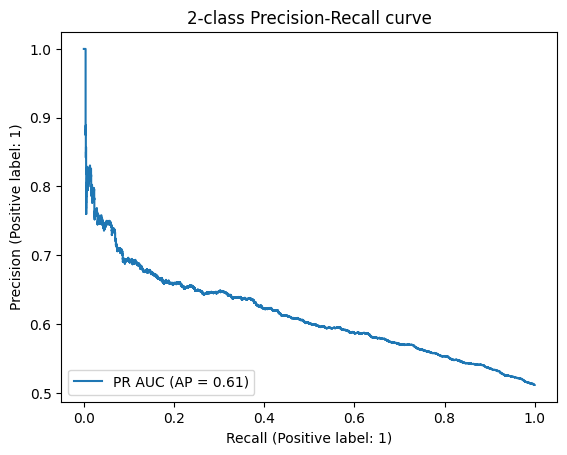

In [45]:
from sklearn.metrics import PrecisionRecallDisplay

if train_test == 'fold':
    disp = PrecisionRecallDisplay.from_predictions(
        y.values, oof, name="PR AUC"
    )
    _ = disp.ax_.set_title("2-class Precision-Recall curve")

# vol 1e6 AP=0.61

# Find the best threshold

ic| bound: 0.5
    prec_score: 0.58094
    obj_num: 3935
    obj_pct: 0.57
    obj_profit: 637
ic| bound: 0.51
    prec_score: 0.58707
    obj_num: 3773
    obj_pct: 0.54
    obj_profit: 657
ic| bound: 0.52
    prec_score: 0.58827
    obj_num: 3597
    obj_pct: 0.52
    obj_profit: 635
ic| bound: 0.53
    prec_score: 0.59248
    obj_num: 3433
    obj_pct: 0.49
    obj_profit: 635
ic| bound: 0.54
    prec_score: 0.59437
    obj_num: 3269
    obj_pct: 0.47
    obj_profit: 617
ic| bound: 0.55
    prec_score: 0.5969
    obj_num: 3101
    obj_pct: 0.45
    obj_profit: 601
ic| bound: 0.56
    prec_score: 0.60266
    obj_num: 2937
    obj_pct: 0.42
    obj_profit: 603
ic| bound: 0.57
    prec_score: 0.60895
    obj_num: 2772
    obj_pct: 0.4
    obj_profit: 604
ic| bound: 0.58
    prec_score: 0.61107
    obj_num: 2638
    obj_pct: 0.38
    obj_profit: 586
ic| bound: 0.59
    prec_score: 0.61712
    obj_num: 2489
    obj_pct: 0.36
    obj_profit: 583
ic| bound: 0.6
    prec_score: 0.62271
    

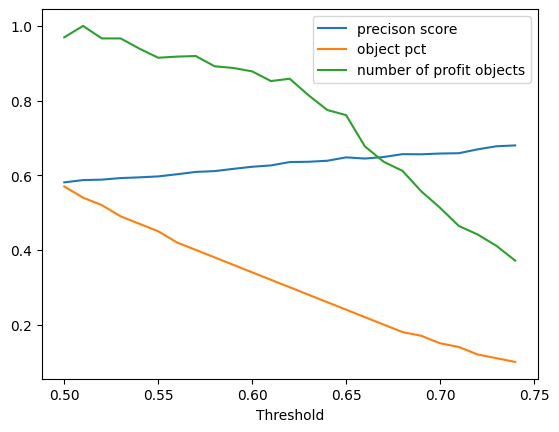

In [48]:
from icecream import ic

if train_test == 'fold':
    prec_score_list = list()
    obj_num_list = list()
    obj_pct_list = list()
    obj_profit_list = list()
    max_obj_profit = 0
    for hb in np.arange(0.5, 0.75, 0.01):
        prec_score, obj_num, obj_pct = confident_score(y.reset_index(drop=True), oof, 1-hb, hb)
        bound, prec_score, obj_num, obj_pct = round(hb, 2), round(prec_score, 5), round(obj_num, 2), round(obj_pct, 2)
        obj_profit = round(obj_num * prec_score - obj_num * (1 - prec_score))
        prec_score_list.append(prec_score)
        obj_num_list.append(obj_num)
        obj_pct_list.append(obj_pct)
        obj_profit_list.append(obj_profit)
        max_obj_profit = max(max_obj_profit, obj_profit)
        ic(bound, prec_score, obj_num, obj_pct, obj_profit)

    obj_profit_list = [o / max_obj_profit for o in obj_profit_list]
    line1 = plt.plot(np.arange(0.5, 0.75, 0.01), prec_score_list, label='precison score')
    line2 = plt.plot(np.arange(0.5, 0.75, 0.01), obj_pct_list, label='object pct')
    line3 = plt.plot(np.arange(0.5, 0.75, 0.01), obj_profit_list, label='number of profit objects')
    plt.legend()
    plt.xlabel("Threshold")
    plt.show()

In [27]:
# ic| bound: 0.5
#     prec_score: 0.58094
#     obj_num: 3935
#     obj_pct: 0.57
#     obj_profit: 637
# ic| bound: 0.51
#     prec_score: 0.58707
#     obj_num: 3773
#     obj_pct: 0.54
#     obj_profit: 657
# ic| bound: 0.52
#     prec_score: 0.58827
#     obj_num: 3597
#     obj_pct: 0.52
#     obj_profit: 635
# ic| bound: 0.53
#     prec_score: 0.59248
#     obj_num: 3433
#     obj_pct: 0.49
#     obj_profit: 635
# ic| bound: 0.54
#     prec_score: 0.59437
#     obj_num: 3269
#     obj_pct: 0.47
#     obj_profit: 617
# ic| bound: 0.55
#     prec_score: 0.5969
#     obj_num: 3101
#     obj_pct: 0.45
#     obj_profit: 601
# ic| bound: 0.56
#     prec_score: 0.60266
#     obj_num: 2937
#     obj_pct: 0.42
#     obj_profit: 603
# ic| bound: 0.57
#     prec_score: 0.60895
#     obj_num: 2772
#     obj_pct: 0.4
#     obj_profit: 604
# ic| bound: 0.58
#     prec_score: 0.61107
#     obj_num: 2638
#     obj_pct: 0.38
#     obj_profit: 586
# ic| bound: 0.59
#     prec_score: 0.61712
#     obj_num: 2489
#     obj_pct: 0.36
#     obj_profit: 583
# ic| bound: 0.6
#     prec_score: 0.62271
#     obj_num: 2351
#     obj_pct: 0.34
#     obj_profit: 577
# ic| bound: 0.61
#     prec_score: 0.62635
#     obj_num: 2216
#     obj_pct: 0.32
#     obj_profit: 560
# ic| bound: 0.62
#     prec_score: 0.63532
#     obj_num: 2084
#     obj_pct: 0.3
#     obj_profit: 564
# ic| bound: 0.63
#     prec_score: 0.63613
#     obj_num: 1965
#     obj_pct: 0.28
#     obj_profit: 535
# ic| bound: 0.64
#     prec_score: 0.63884
#     obj_num: 1833
#     obj_pct: 0.26
#     obj_profit: 509
# ic| bound: 0.65
#     prec_score: 0.64793
#     obj_num: 1690
#     obj_pct: 0.24
#     obj_profit: 500
# ic| bound: 0.66
#     prec_score: 0.64476
#     obj_num: 1537
#     obj_pct: 0.22
#     obj_profit: 445
# ic| bound: 0.67
#     prec_score: 0.64886
#     obj_num: 1404
#     obj_pct: 0.2
#     obj_profit: 418
# ic| bound: 0.68
#     prec_score: 0.65654
#     obj_num: 1284
#     obj_pct: 0.18
#     obj_profit: 402
# ic| bound: 0.69
#     prec_score: 0.65614
#     obj_num: 1172
#     obj_pct: 0.17
#     obj_profit: 366
# ic| bound: 0.7
#     prec_score: 0.65822
#     obj_num: 1065
#     obj_pct: 0.15
#     obj_profit: 337
# ic| bound: 0.71
#     prec_score: 0.65902
#     obj_num: 959
#     obj_pct: 0.14
#     obj_profit: 305
# ic| bound: 0.72
#     prec_score: 0.66939
#     obj_num: 856
#     obj_pct: 0.12
#     obj_profit: 290
# ic| bound: 0.73
#     prec_score: 0.67763
#     obj_num: 760
#     obj_pct: 0.11
#     obj_profit: 270
# ic| bound: 0.74
#     prec_score: 0.67994
#     obj_num: 678
#     obj_pct: 0.1
#     obj_profit: 244